In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
ins = pd.read_csv('insurance.csv')
ins

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
ins.shape

(1338, 7)

In [4]:
ins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
ins.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


In [7]:
ins.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [11]:
ins_num = ins.select_dtypes([int,float])
ins_num = ins_num.round(2)

,age,bmi,children,charges
0,19,27.90,0,16884.92
1,18,33.77,1,1725.55
2,28,33.00,3,4449.46
3,33,22.70,0,21984.47
4,32,28.88,0,3866.86
...,...,...,...,...
1333,50,30.97,3,10600.55
1334,18,31.92,0,2205.98
1335,18,36.85,0,1629.83
1336,21,25.80,0,2007.94


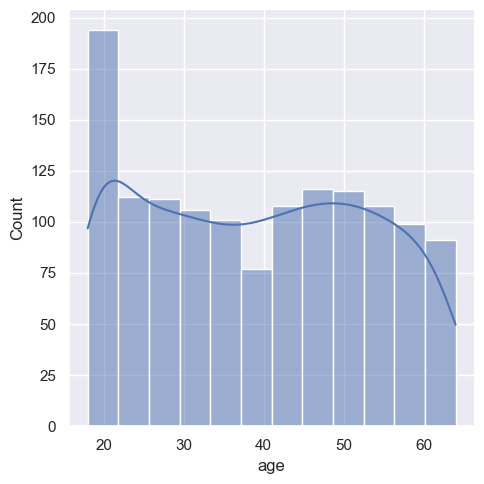

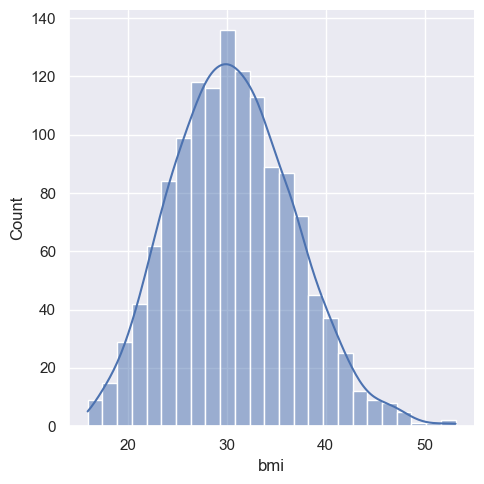

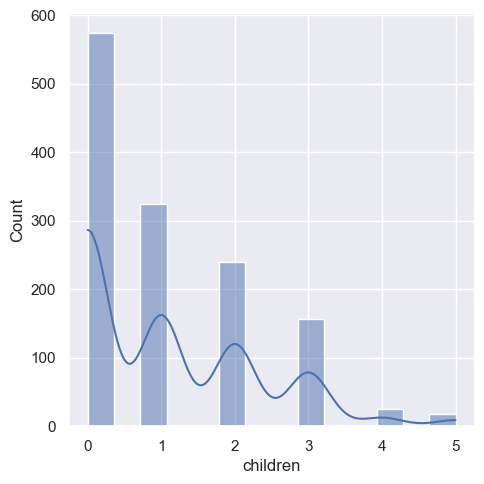

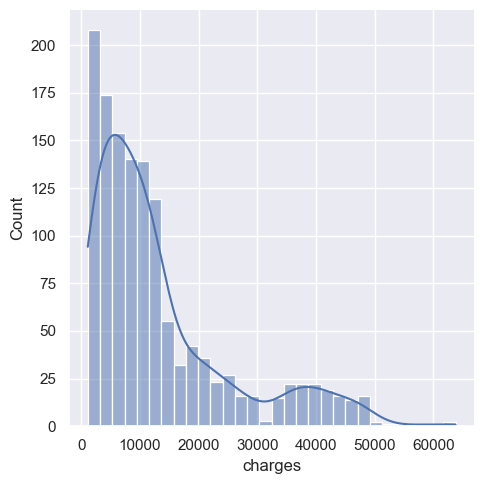

In [15]:
for i in ins_num:
    sns.displot(x=ins_num[i],kde=True)
    plt.savefig('displot.png')

<AxesSubplot: xlabel='sex', ylabel='count'>

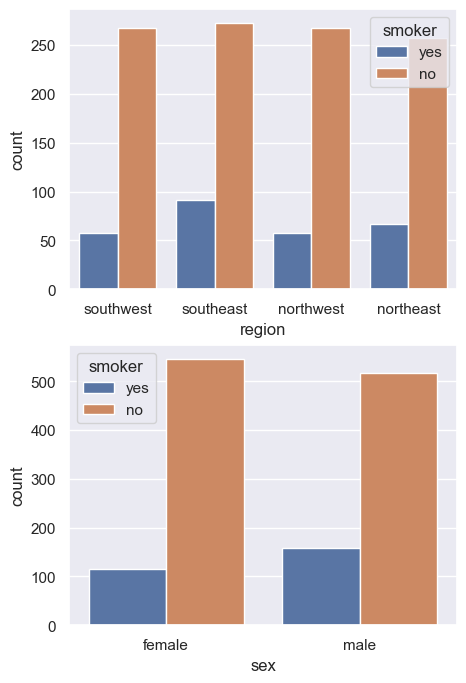

In [31]:
ins_obj = ins.select_dtypes(object)

plt.figure(figsize=[5,8])
plt.subplot(2,1,1)
sns.countplot(x=ins_obj['region'],hue=ins_obj['smoker'])
plt.subplot(2,1,2)
sns.countplot(x=ins_obj['sex'],hue=ins_obj['smoker'])


In [44]:
print('BMI')
print(ins.groupby('sex')['bmi'].aggregate(['min','max','mean']))
print('*'*30)
print('AGE')
print(ins.groupby('sex')['age'].aggregate(['min','max','mean']))
print('*'*30)
print('CHILDREN')
print(ins.groupby('sex')['children'].aggregate(['min','max','mean']))
print('*'*30)
print('CHARGES')
print(ins.groupby('sex')['charges'].aggregate(['min','max','mean']))

BMI
           min    max       mean
sex                             
female  16.815  48.07  30.377749
male    15.960  53.13  30.943129
******************************
AGE
        min  max       mean
sex                        
female   18   64  39.503021
male     18   64  38.917160
******************************
CHILDREN
        min  max      mean
sex                       
female    0    5  1.074018
male      0    5  1.115385
******************************
CHARGES
              min          max          mean
sex                                         
female  1607.5101  63770.42801  12569.578844
male    1121.8739  62592.87309  13956.751178


In [45]:
print('BMI')
print(ins.groupby('region')['bmi'].aggregate(['min','max','mean']))
print('*'*30)
print('AGE')
print(ins.groupby('region')['age'].aggregate(['min','max','mean']))
print('*'*30)
print('CHILDREN')
print(ins.groupby('region')['children'].aggregate(['min','max','mean']))
print('*'*30)
print('CHARGES')
print(ins.groupby('region')['charges'].aggregate(['min','max','mean']))

BMI
              min    max       mean
region                             
northeast  15.960  48.07  29.173503
northwest  17.385  42.94  29.199785
southeast  19.800  53.13  33.355989
southwest  17.400  47.60  30.596615
******************************
AGE
           min  max       mean
region                        
northeast   18   64  39.268519
northwest   19   64  39.196923
southeast   18   64  38.939560
southwest   19   64  39.455385
******************************
CHILDREN
           min  max      mean
region                       
northeast    0    5  1.046296
northwest    0    5  1.147692
southeast    0    5  1.049451
southwest    0    5  1.141538
******************************
CHARGES
                 min          max          mean
region                                         
northeast  1694.7964  58571.07448  13406.384516
northwest  1621.3402  60021.39897  12417.575374
southeast  1121.8739  63770.42801  14735.411438
southwest  1241.5650  52590.82939  12346.937377


In [46]:
print('BMI')
print(ins.groupby('smoker')['bmi'].aggregate(['min','max','mean']))
print('*'*30)
print('AGE')
print(ins.groupby('smoker')['age'].aggregate(['min','max','mean']))
print('*'*30)
print('CHILDREN')
print(ins.groupby('smoker')['children'].aggregate(['min','max','mean']))
print('*'*30)
print('CHARGES')
print(ins.groupby('smoker')['charges'].aggregate(['min','max','mean']))

BMI
           min    max       mean
smoker                          
no      15.960  53.13  30.651795
yes     17.195  52.58  30.708449
******************************
AGE
        min  max       mean
smoker                     
no       18   64  39.385338
yes      18   64  38.514599
******************************
CHILDREN
        min  max      mean
smoker                    
no        0    5  1.090226
yes       0    5  1.113139
******************************
CHARGES
               min          max          mean
smoker                                       
no       1121.8739  36910.60803   8434.268298
yes     12829.4551  63770.42801  32050.231832


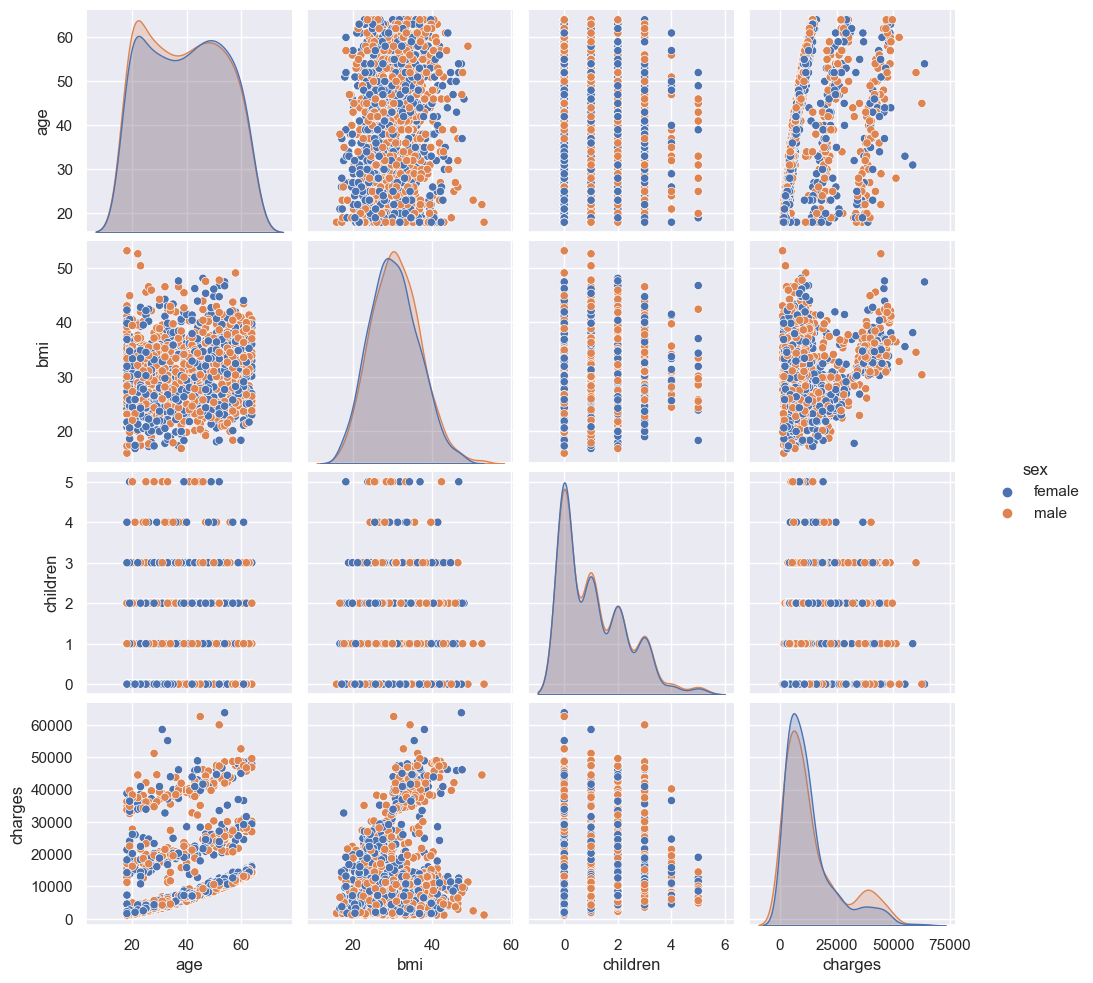

In [87]:
sns.pairplot(ins,hue='sex')

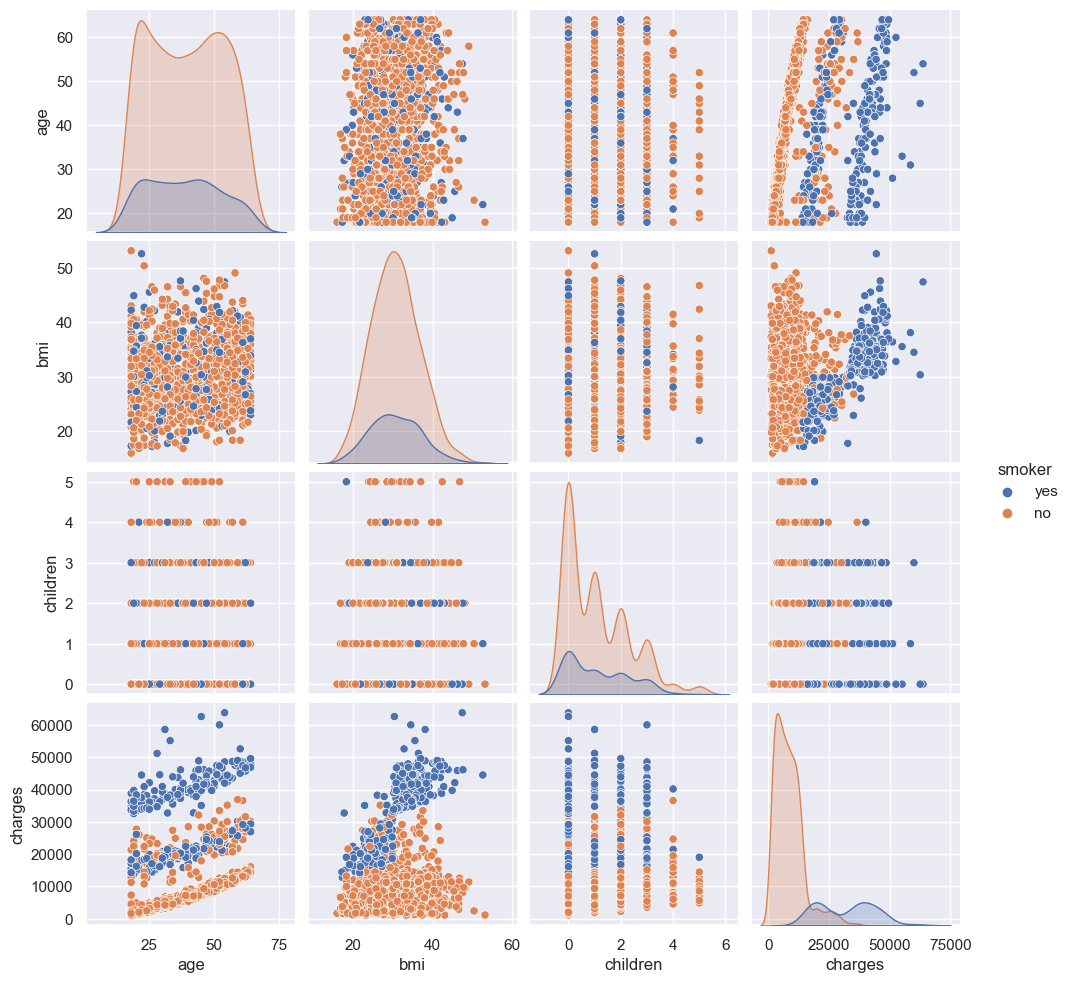

In [89]:
sns.pairplot(ins,hue='smoker')

C:\Users\shubham\AppData\Local\Temp\ipykernel_5132\1916781079.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(ins.corr(),annot=True)


<AxesSubplot: >

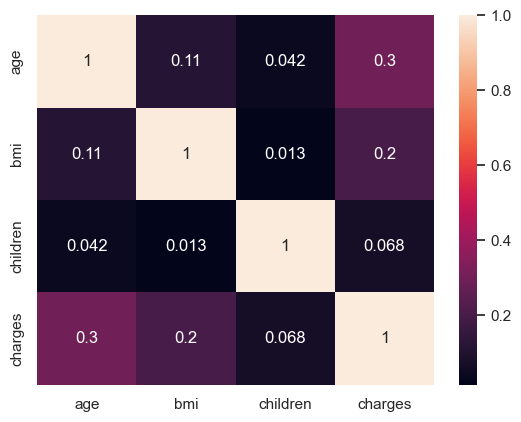

In [91]:
sns.heatmap(ins.corr(),annot=True)

In [48]:
ins_dum = pd.get_dummies(ins)
ins_dum

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [73]:
ins_dum.cov()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
age,197.401387,9.362337,0.719303,5.087480e+04,0.146559,-0.146559,0.141903,-0.141903,0.014902,-0.002456,-0.072818,0.060372
bmi,9.362337,37.187884,0.093795,1.464730e+04,-0.141435,0.141435,-0.009233,0.009233,-0.361051,-0.355777,0.733062,-0.016233
children,0.719303,0.093795,1.453213,9.926742e+02,-0.010348,0.010348,-0.003734,0.003734,-0.011783,0.012829,-0.012379,0.011333
charges,50874.802298,14647.304426,992.674197,1.466524e+08,-347.014469,347.014469,-3848.667032,3848.667032,32.948219,-207.311324,398.845220,-224.482116
sex_female,0.146559,-0.141435,-0.010348,-3.470145e+02,0.250160,-0.250160,0.015383,-0.015383,0.000520,0.002394,-0.003811,0.000898
sex_male,-0.146559,0.141435,0.010348,3.470145e+02,-0.250160,0.250160,-0.015383,0.015383,-0.000520,-0.002394,0.003811,-0.000898
smoker_no,0.141903,-0.009233,-0.003734,-3.848667e+03,0.015383,-0.015383,0.162969,-0.162969,-0.000486,0.006398,-0.012310,0.006398
smoker_yes,-0.141903,0.009233,0.003734,3.848667e+03,-0.015383,0.015383,-0.162969,0.162969,0.000486,-0.006398,0.012310,-0.006398
region_northeast,0.014902,-0.361051,-0.011783,3.294822e+01,0.000520,-0.000520,-0.000486,0.000486,0.183652,-0.058863,-0.065926,-0.058863
region_northwest,-0.002456,-0.355777,0.012829,-2.073113e+02,0.002394,-0.002394,0.006398,-0.006398,-0.058863,0.184037,-0.066130,-0.059044


In [74]:
ins_dum.var()

age                 1.974014e+02
bmi                 3.718788e+01
children            1.453213e+00
charges             1.466524e+08
sex_female          2.501596e-01
sex_male            2.501596e-01
smoker_no           1.629689e-01
smoker_yes          1.629689e-01
region_northeast    1.836519e-01
region_northwest    1.840371e-01
region_southeast    1.981859e-01
region_southwest    1.840371e-01
dtype: float64

In [75]:
ins_dum.corr()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
age,1.000000,0.109272,0.042469,0.299008,0.020856,-0.020856,0.025019,-0.025019,0.002475,-0.000407,-0.011642,0.010016
bmi,0.109272,1.000000,0.012759,0.198341,-0.046371,0.046371,-0.003750,0.003750,-0.138156,-0.135996,0.270025,-0.006205
children,0.042469,0.012759,1.000000,0.067998,-0.017163,0.017163,-0.007673,0.007673,-0.022808,0.024806,-0.023066,0.021914
charges,0.299008,0.198341,0.067998,1.000000,-0.057292,0.057292,-0.787251,0.787251,0.006349,-0.039905,0.073982,-0.043210
sex_female,0.020856,-0.046371,-0.017163,-0.057292,1.000000,-1.000000,0.076185,-0.076185,0.002425,0.011156,-0.017117,0.004184
sex_male,-0.020856,0.046371,0.017163,0.057292,-1.000000,1.000000,-0.076185,0.076185,-0.002425,-0.011156,0.017117,-0.004184
smoker_no,0.025019,-0.003750,-0.007673,-0.787251,0.076185,-0.076185,1.000000,-1.000000,-0.002811,0.036945,-0.068498,0.036945
smoker_yes,-0.025019,0.003750,0.007673,0.787251,-0.076185,0.076185,-1.000000,1.000000,0.002811,-0.036945,0.068498,-0.036945
region_northeast,0.002475,-0.138156,-0.022808,0.006349,0.002425,-0.002425,-0.002811,0.002811,1.000000,-0.320177,-0.345561,-0.320177
region_northwest,-0.000407,-0.135996,0.024806,-0.039905,0.011156,-0.011156,0.036945,-0.036945,-0.320177,1.000000,-0.346265,-0.320829


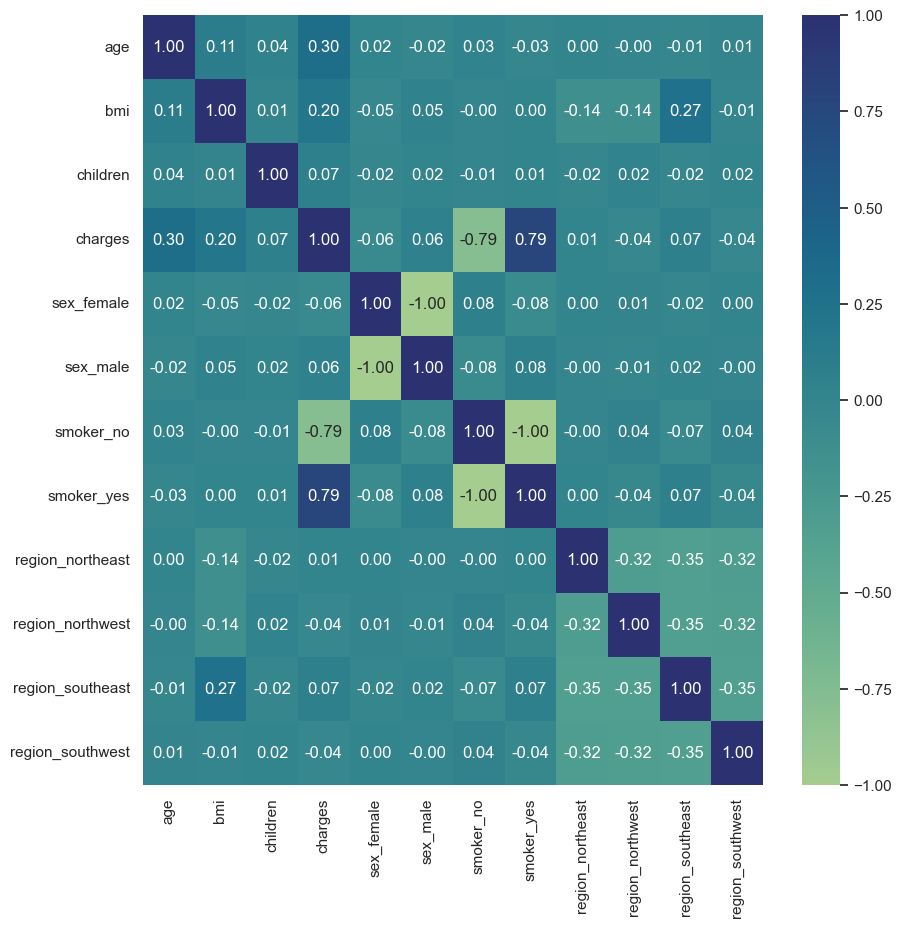

In [83]:
plt.figure(figsize=[10,10])
sns.heatmap(ins_dum.corr(),annot=True,cmap='crest',fmt=".2f")
plt.savefig('heatmap.png')

In [49]:
X = ins_dum.drop(['charges'],axis=1)
y = ins_dum['charges']

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [57]:
print('X_train shape :',X_train.shape)
print('X_test shape :',X_test.shape)
print('y_train shape :',y_train.shape)
print('y_test shape :',y_test.shape)

X_train shape : (1070, 11)
X_test shape : (268, 11)
y_train shape : (1070,)
y_test shape : (268,)


In [52]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

In [53]:
lr.fit(X_train,y_train)

LinearRegression()

In [55]:
y_test_pred = lr.predict(X_test) 
y_test_pred

array([ 8969.55027444,  7068.74744287, 36858.41091155,  9454.67850053,
       26973.17345656, 10864.11316424,   170.28084137, 16903.45028662,
        1092.43093614, 11218.34318352, 28101.68455267,  9377.73460205,
        5263.0595179 , 38416.04221107, 40255.82339284, 37098.25353123,
       15240.39392306, 35912.88264434,  9112.52398703, 31461.92108909,
        3847.68845883, 10130.12001517,  2370.54189389,  7140.21550828,
       11301.76782638, 12961.65366224, 14509.47251876,  6159.8976107 ,
        9963.85857263,  2177.85718217,  9115.93673493, 13073.68932159,
        4561.82376202,  3408.20756033,  4459.81359745, 13032.06505076,
        1979.99357292,  8813.28303303, 33271.29124448, 32585.51583927,
        3908.76090964,  4326.10774721, 14142.81326533, 11423.45494846,
        8774.13955311, 12097.28051001,  5281.57353499,  3150.5596042 ,
       35494.46461214,  9150.1124786 , 15836.84575621,  2343.57470069,
       12364.78414194,  1482.29488266, 13389.06105161, 12573.57395972,
      

In [58]:
print(y_test_pred.shape)

(268,)


In [59]:
lr.coef_

array([ 2.56975706e+02,  3.37092552e+02,  4.25278784e+02,  9.29584582e+00,
       -9.29584582e+00, -1.18255644e+04,  1.18255644e+04,  4.59585244e+02,
        8.89079180e+01, -1.98279052e+02, -3.50214110e+02])

In [60]:
lr.intercept_

-574.5357125102109

In [62]:
print('Train Model Score :',lr.score(X_train,y_train))
print('Test Model Score :',lr.score(X_test,y_test))

Train Model Score : 0.7417255854683333
Test Model Score : 0.7835929767120723


In [63]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [69]:
mae = mean_absolute_error(y_test,y_test_pred)
mse = mean_squared_error(y_test,y_test_pred)
rmse = np.sqrt(mean_absolute_error(y_test,y_test_pred))
# r2_score = r2_score(y_test, y_test_pred)
adj_r2 = 1 -  ((1-r2_score)* ((X_test.shape[0]-1))/ (X_test.shape[0] - X_test.shape[1] -1))

print('mean_absolute_error :',mae)
print('mean_squared_error :',mse)
print('root_mean_squared_error :',rmse)
print('r2_score :',r2_score)
print('adjusted_r2_score :',adj_r2)

mean_absolute_error : 4181.194473753648
mean_squared_error : 33596915.85136147
root_mean_squared_error : 64.66215642672032
r2_score : 0.7835929767120723
adjusted_r2_score : 0.7742942374301691


In [70]:
residual = y_test - y_test_pred
residual

764       125.517976
887     -1796.571643
890     -7527.427762
1293     -152.784951
259      6777.118343
            ...     
109      7994.031168
575       461.399102
535     -1620.436882
543     22850.136498
846     -2445.885653
Name: charges, Length: 268, dtype: float64

Evaluation of training data

In [94]:
y_train_pred = lr.predict(X_train) 
y_train_pred

array([ 7094.54007011,  8344.72998713,  9153.77419778, ...,
       11441.08519155, 37314.37460682, 11453.12102783])

In [95]:
print(y_train_pred.shape)

(1070,)


In [96]:
mae = mean_absolute_error(y_train,y_train_pred)
mse = mean_squared_error(y_train,y_train_pred)
rmse = np.sqrt(mean_absolute_error(y_train,y_train_pred))
# r2_score = r2_score(y_train, y_train_pred)
adj_r2 = 1 -  ((1-r2_score)* ((X_train.shape[0]-1))/ (X_train.shape[0] - X_train.shape[1] -1))

print('mean_absolute_error :',mae)
print('mean_squared_error :',mse)
print('root_mean_squared_error :',rmse)
print('r2_score :',r2_score)
print('adjusted_r2_score :',adj_r2)

mean_absolute_error : 4208.234572492223
mean_squared_error : 37277681.70201866
root_mean_squared_error : 64.8709069806506
r2_score : 0.7835929767120723
adjusted_r2_score : 0.7813429982090787


In [97]:
0.7835929767120723 - 0.7835929767120723

0.0